# KNN (K Nearest Neighbours)

**Observes the nature of nearest nighbours
Lazy Learning Algorithm
Simplest Machine Learning Algorithm**

### k-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression tasks. The basic idea behind KNN is to predict the label of a data point by looking at its k nearest neighbors in the feature space. 
* Choose k 
* Normalize Features (Optional)
* Calculate distance of new point from all train data poiints
* Sort the distane list in ascending order
* Chosse first k distances from the sorted list
* Take mean(for regression) or mode(for classifocation)

In [58]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## load the data

In [2]:
data=pd.read_csv("E:\DS_ACADEMIC\DataSets\day36-imputing-numerical-data_titanic_toy.csv")
data.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
# Impute Missing values with mean  of the age column
mean_age=data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)

In [7]:
# Impute forward fill miussing values in the 'Fare column'
data['Fare'].fillna(method='ffill', inplace =True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Fare      891 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [10]:
data.sample(5)

,Age,Fare,Family,Survived
858,24.000000,19.2583,3,1
607,27.000000,30.5000,0,1
773,29.699118,7.2250,0,0
402,21.000000,9.8250,1,0
720,6.000000,33.0000,1,1


## Segregating variables: Independent and Dependent Variables

In [13]:
# Seprating independent and Dependent Variables
x=data.drop(['Survived'], axis=1)
y=data['Survived']
x.shape, y.shape

((891, 3), (891,))

In [17]:
# Scaling the data(Using Min Max Scaler)
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler()
x_scaled=scl.fit_transform(x)

In [18]:
x= pd.DataFrame(x_scaled, columns=x.columns)

## Splitting Data

In [20]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y= train_test_split(x,y, test_size=0.25, random_state=42, stratify=y)

In [21]:
train_x.shape

(668, 3)

In [22]:
# Implementing KNN Classiefier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [23]:
# Creating instances of KNN
clf=KNN(n_neighbors=5)

# Fitting the model
clf.fit(train_x,train_y)

# Predicting over the Test Set and calculating F1
test_predict= clf.predict(test_x)
k= f1_score(test_predict, test_y)
print('Test_F1_Score',k)

Test_F1_Score 0.5034013605442177


# Elbow for Classifier

In [27]:
def Elbow(K):
    # Intializing empty list
    test_error=[]
    
    # Training model for every vlaue of K
    for i in K:
        # instances of KNN
        clf=KNN(n_neighbors=i)
        clf.fit(train_x,train_y)
        
        # Appending F1 scores to empty list clalulated using ptrediction
        tmp=clf.predict(test_x)
        tmp=f1_score(tmp,test_y)
        error=1-tmp
        test_error.append(error)
        
    return test_error
    

In [28]:
# Define K range
k=range(6,20,2)

In [29]:
# Calling elbow function
test=Elbow(k)

Text(0.5, 1.0, 'Elbow Curve Test')

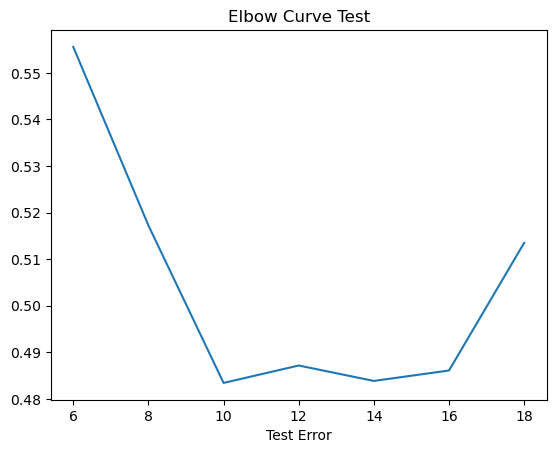

In [30]:
# Ploting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.xlabel('Test Error')
plt.title("Elbow Curve Test")

In [31]:
# Creating instances of KNN
clf=KNN(n_neighbors=10)

# Fitting the model
clf.fit(train_x,train_y)

# Predicting over the Test Set and calculating F1
test_predict= clf.predict(test_x)
k= f1_score(test_predict, test_y)
print('Test_F1_Score',k)

Test_F1_Score 0.5165562913907285


## Implementing KNN Regressor

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [36]:
 # Creating instnces of KNN
reg=KNeighborsRegressor(n_neighbors=5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the test data set
test_predict=reg.predict(test_x)
k=mean_squared_error(test_predict, test_y)
print('Test MSE', k)

Test MSE 0.25614349775784756


In [48]:
def Elbow(K):
    # Intializing empty list
    test_mse=[]
    
    # Training model for every vlaue of K
    for i in K:
        # instances of KNN
        reg=KNeighborsRegressor(n_neighbors=i)
        reg.fit(train_x,train_y)
        
        # Appending F1 scores to empty list clalulated using ptrediction
        tmp=reg.predict(test_x)
        tmp=mean_squared_error(tmp,test_y)
    
        test_mse.append(tmp)
        
    return test_mse

In [49]:
# Define K range
k=range(1,40)

In [50]:
# Calling above defined function
test=Elbow(k)

Text(0.5, 1.0, 'Elbow Curve Test')

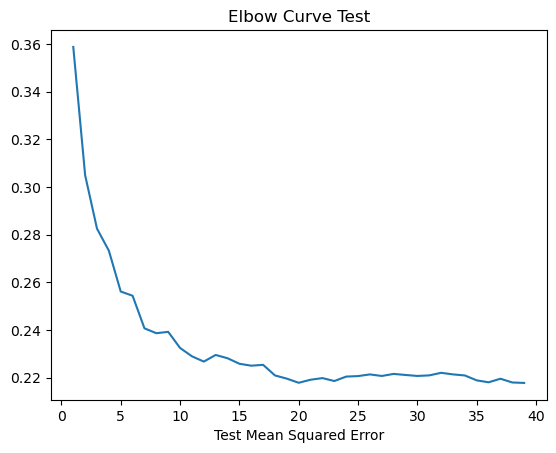

In [51]:
# Ploting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.xlabel('Test Mean Squared Error')
plt.title("Elbow Curve Test")

In [57]:
 # Creating instnces of KNN
reg=KNeighborsRegressor(n_neighbors=20)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the test data set
test_predict=reg.predict(test_x)
k=mean_squared_error(test_predict, test_y)
print('Test MSE', k)

Test MSE 0.21784753363228698


## Determining the optimal value of k

Determining the optimal value of :
k for k-Nearest Neighbors (kNN) involves finding a balance between bias and variance. The choice of 
k affects the model's performance, and selecting an appropriate k value is crucial for the effectiveness of the algorithm. Here are common methods to find the optimal k for kNN:

## 1. Grid Search:

Choose a range of k values, usually odd numbers to avoid ties in binary classification.
Train the kNN algorithm for each k value on a subset of your training data.
Evaluate the model's performance using cross-validation or a separate validation set.
Select the k that gives the best performance.

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Create a kNN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best k
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(train_x,train_y)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print(best_k)

9


## 2. Elbow Method:

Train the kNN algorithm for a range of k values and record the error (e.g., misclassification rate or mean squared error) on a validation set.
Plot the error as a function of k.
Look for the "elbow" point where further increases in k result in diminishing returns in terms of error reduction.

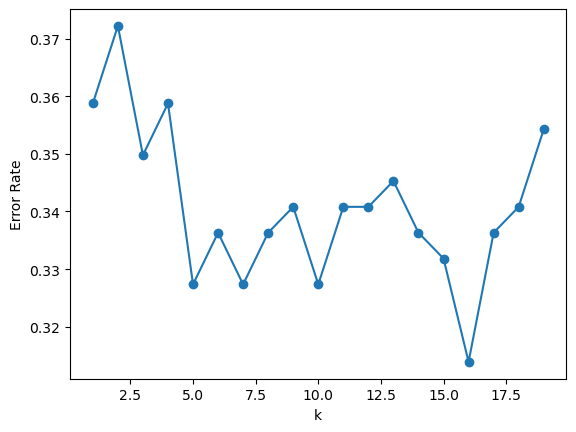

In [65]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

error_rates = []

# Test different values of k
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
    error = 1 - knn.score(test_x, test_y)
    error_rates.append(error)

# Plot the error rates
plt.plot(range(1, 20), error_rates, marker='o')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

## 3 Cross-Validation:

Perform k-fold cross-validation for different k values.
Calculate the average performance metric (e.g., accuracy) for each k.
Choose the k that maximizes the average performance metric.

In [66]:
from sklearn.model_selection import cross_val_score

k_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Evaluate kNN for each k using cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_x, train_y, cv=5)
    average_accuracy = scores.mean()
    print(f'k={k}, Average Accuracy: {average_accuracy}')

k=1, Average Accuracy: 0.6886208057457075
k=3, Average Accuracy: 0.6915834362024464
k=5, Average Accuracy: 0.7035574009650993
k=7, Average Accuracy: 0.7020648636516664
k=9, Average Accuracy: 0.7155650319829425
k=11, Average Accuracy: 0.7065424755919649
k=13, Average Accuracy: 0.6945572887442486
k=15, Average Accuracy: 0.7006059925934238
